In [27]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# set the notebook to display all columns
pd.set_option("display.max_columns", None)

In [29]:
# Reading the data

df = pd.read_csv(r"C:\Users\manju\DS_&_DA\Telecom_churn_prediction - Copy\Telco_Customer_Churn.csv")
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3647,1016-DJTSV,Male,1,No,No,8,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.70,572.85,No
4221,7926-IJOOU,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.30,19.3,No
4620,8513-OLYGY,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),115.80,8332.15,No
5052,3255-GRXMG,Male,0,No,Yes,18,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),45.65,747.2,No
6727,0749-IRGQE,Female,1,Yes,No,13,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,45.30,528.45,No
144,1131-QQZEB,Male,1,Yes,No,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),23.95,1756.2,No
6385,0702-PGIBZ,Male,0,No,Yes,4,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.70,364.55,Yes
6541,1635-HDGFT,Female,0,No,Yes,19,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.50,398.55,No
146,6837-BJYDQ,Male,0,No,No,3,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.60,61.35,No
5083,7136-IHZJA,Female,0,Yes,Yes,40,Yes,No,DSL,Yes,Yes,No,Yes,No,Yes,Month-to-month,Yes,Mailed check,71.35,2847.2,No


In [30]:
# get column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [31]:
# Get rows and columns count

df.shape

(7043, 21)

In [32]:
# Check the number of duplicate rows

df.duplicated().sum()

np.int64(0)

In [33]:
# Check any columns has null values

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [34]:
# Get the number of rows with blank values for each column

df.apply(lambda row: row == " ").sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [35]:
# Remove the rows with blank values

df[df.apply(lambda row: (row == " ").any(), axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [36]:
# Data Type Correction for TotalCharges feature
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce") 

### UNIVARIATE ANALYSIS

In [37]:
# get the summary statistics of the numerical columns

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
# Checking skewness of the numerical columns

for col in df.select_dtypes(exclude=["object"]):
    print(col, df[col].skew())

SeniorCitizen 1.8336327440928564
tenure 0.2395397495619829
MonthlyCharges -0.22052443394398033
TotalCharges 0.961642499724251


C:\Users\manju\AppData\Local\Temp\ipykernel_27132\2240467109.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette='pastel')


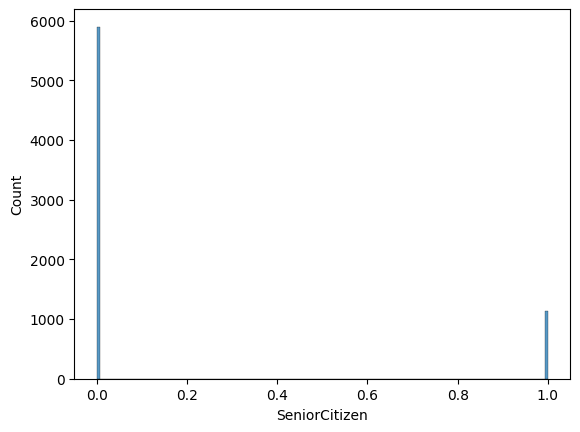

C:\Users\manju\AppData\Local\Temp\ipykernel_27132\2240467109.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette='pastel')


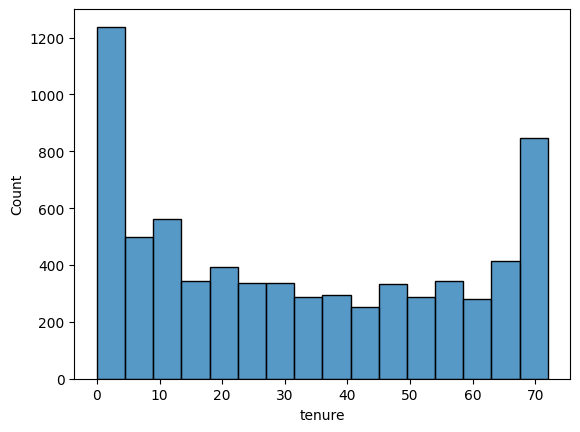

C:\Users\manju\AppData\Local\Temp\ipykernel_27132\2240467109.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette='pastel')


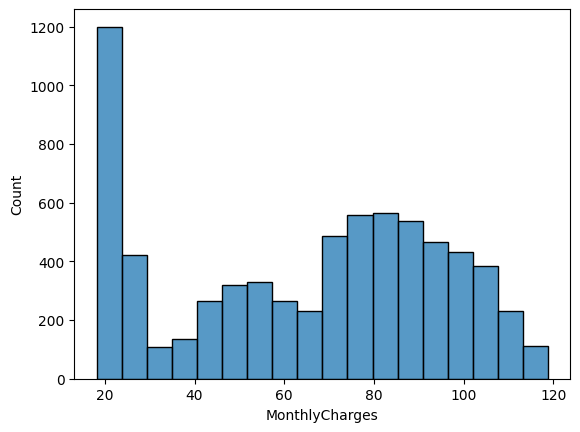

C:\Users\manju\AppData\Local\Temp\ipykernel_27132\2240467109.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette='pastel')


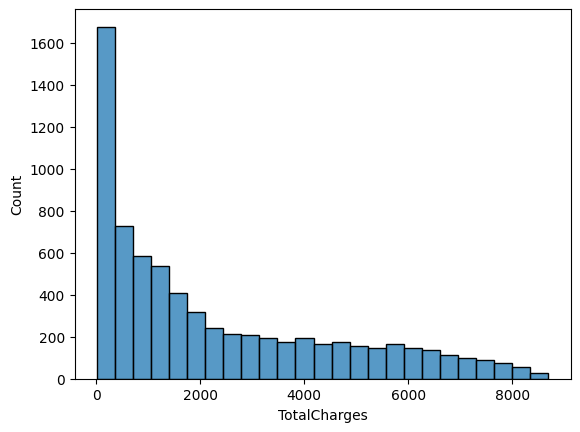

In [38]:
# Univariate analysis of numerical columns 

num_cols = df.select_dtypes(exclude=['object']).columns
for col in num_cols:
    sns.histplot(data=df, x=col, palette='pastel')
    plt.show()

* SeniorCitizen : Clear Imabalance in the senior and non senior citizen data in the SeniorCitizen column.

* Tenure : There are many new customers who are signed up for the services and there are also loyal customers who are stayed for nearly a 
           decade which shows particular segment satisfaction.But the median range tenured customers churned early could be due to the dissatisfaction about the poor services and customer support. 

* Monthly Charges : Most of the customers are in the low-cost tiers whicch is around $20 - $25 and at the same time there are people who choose between $70 - $100 cost.

* Total Charges : There are more newly signed-up customers and as the total charges increases we can observe there are fewer customers up the hill.

C:\Users\manju\AppData\Local\Temp\ipykernel_27132\3351109720.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


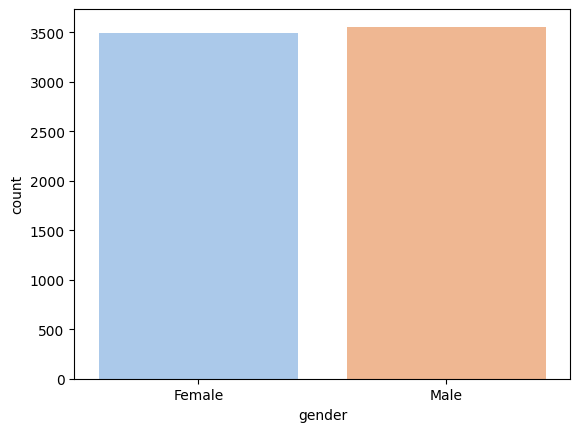

C:\Users\manju\AppData\Local\Temp\ipykernel_27132\3351109720.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


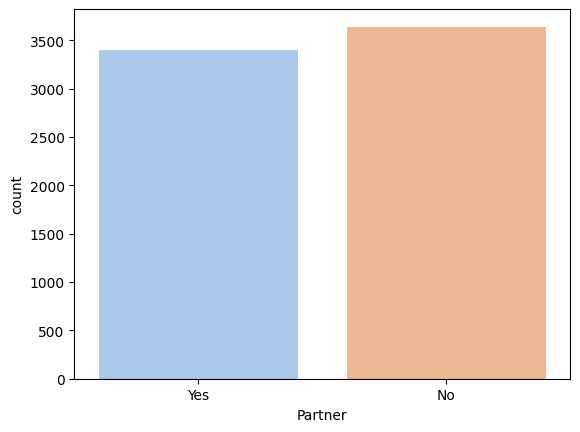

C:\Users\manju\AppData\Local\Temp\ipykernel_27132\3351109720.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


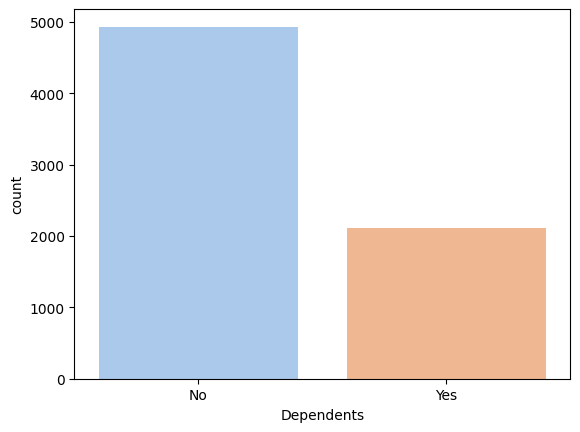

C:\Users\manju\AppData\Local\Temp\ipykernel_27132\3351109720.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


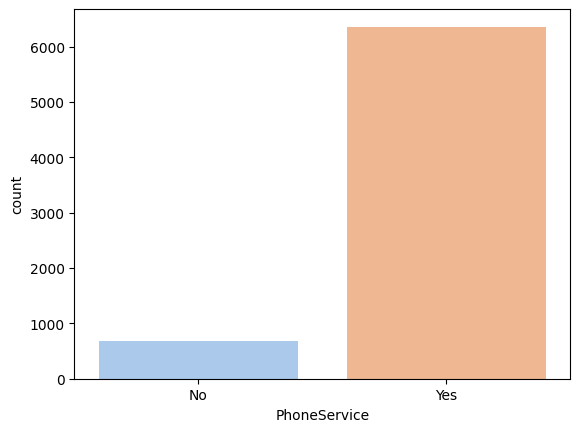

C:\Users\manju\AppData\Local\Temp\ipykernel_27132\3351109720.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


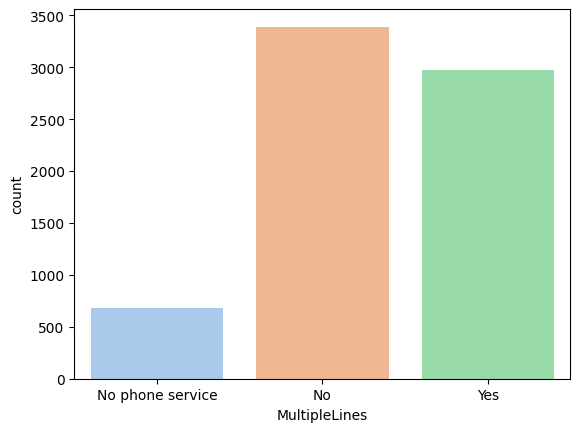

C:\Users\manju\AppData\Local\Temp\ipykernel_27132\3351109720.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


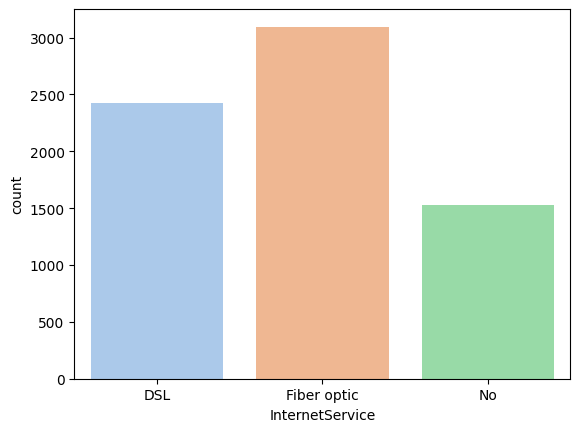

C:\Users\manju\AppData\Local\Temp\ipykernel_27132\3351109720.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


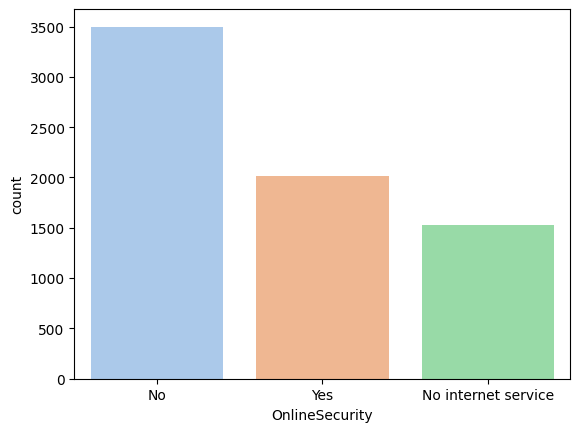

C:\Users\manju\AppData\Local\Temp\ipykernel_27132\3351109720.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


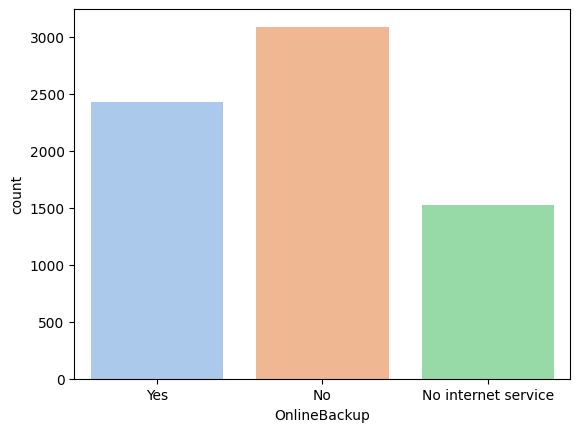

C:\Users\manju\AppData\Local\Temp\ipykernel_27132\3351109720.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


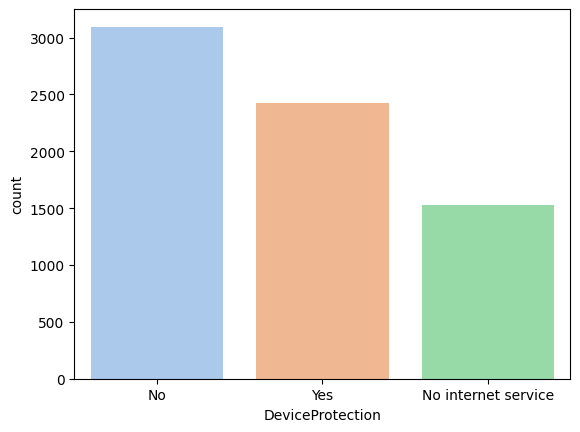

C:\Users\manju\AppData\Local\Temp\ipykernel_27132\3351109720.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


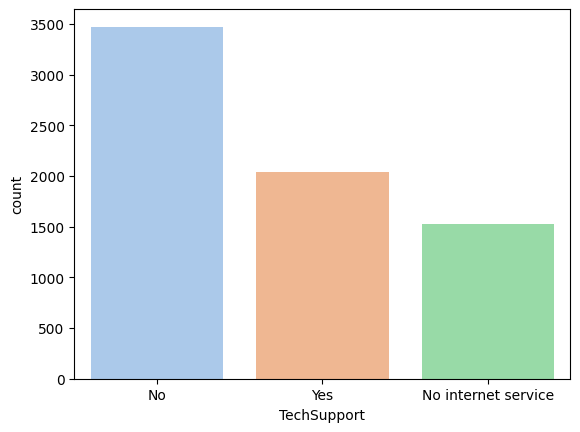

C:\Users\manju\AppData\Local\Temp\ipykernel_27132\3351109720.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


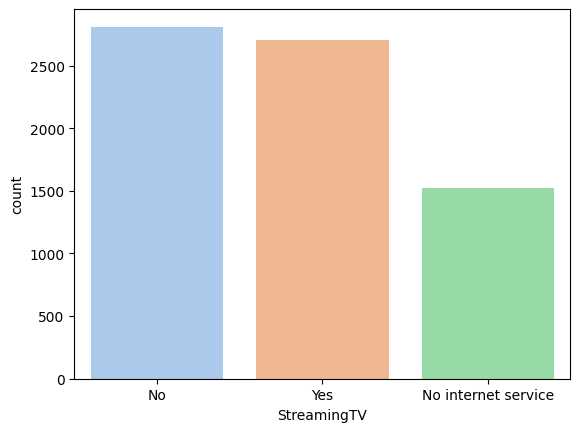

C:\Users\manju\AppData\Local\Temp\ipykernel_27132\3351109720.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


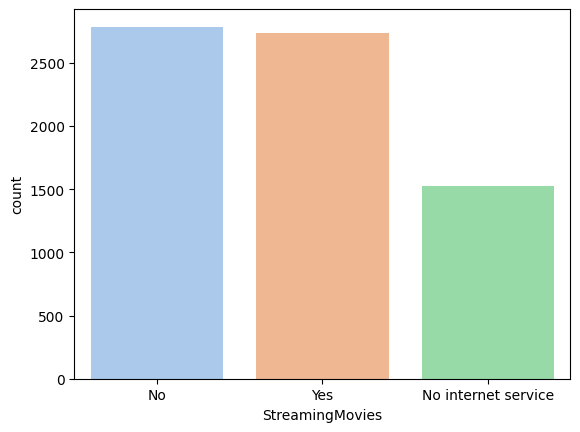

C:\Users\manju\AppData\Local\Temp\ipykernel_27132\3351109720.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


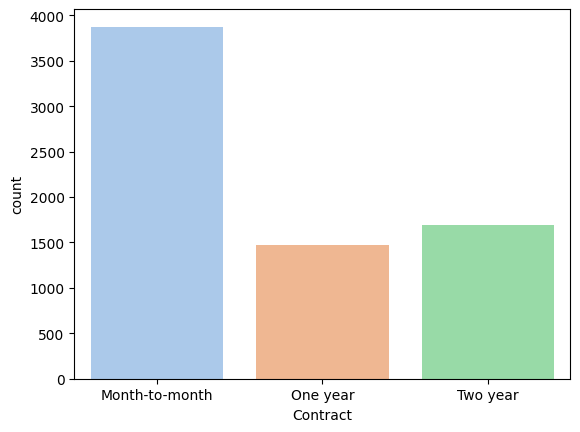

C:\Users\manju\AppData\Local\Temp\ipykernel_27132\3351109720.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


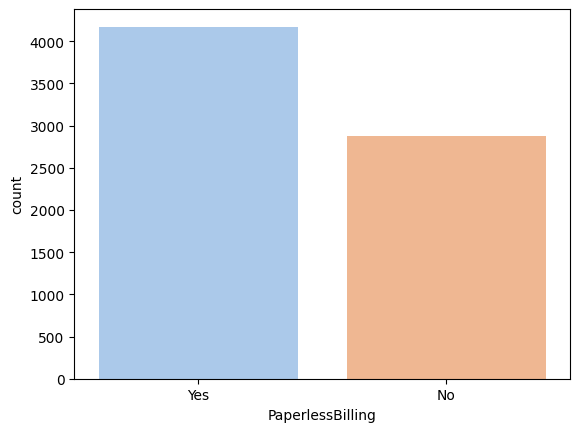

C:\Users\manju\AppData\Local\Temp\ipykernel_27132\3351109720.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


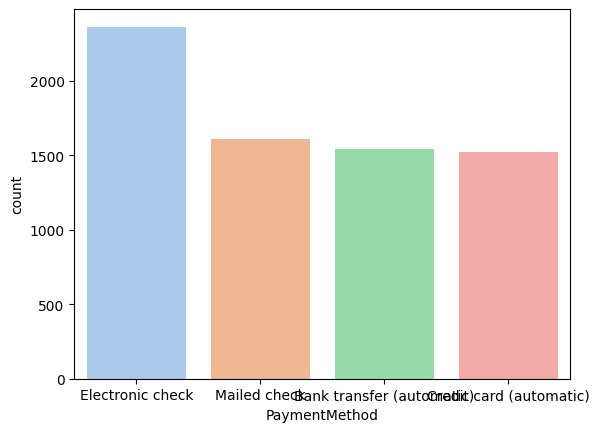

C:\Users\manju\AppData\Local\Temp\ipykernel_27132\3351109720.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


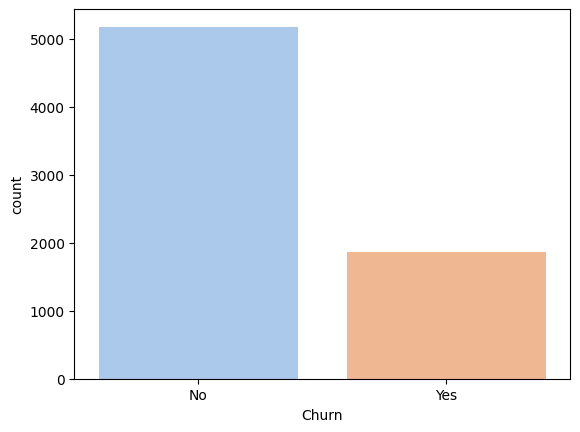

In [39]:
# Categorical univariate analysis
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols = cat_cols.drop(labels=["customerID"])
for col in cat_cols:
    sns.countplot(data=df, x=col, palette='pastel')
    plt.show()

### BIVARIATE ANALYSIS

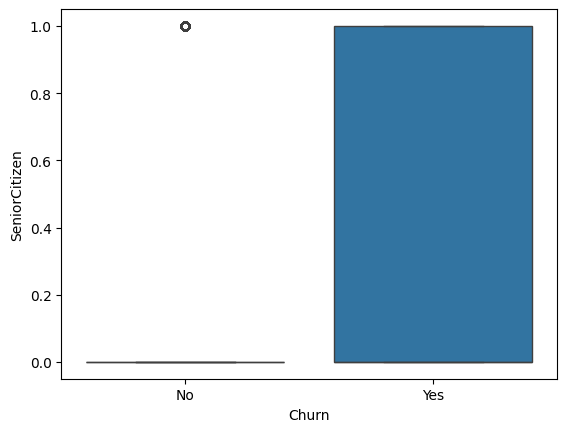

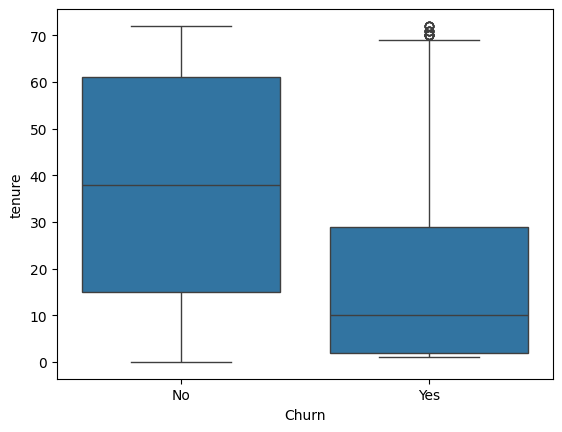

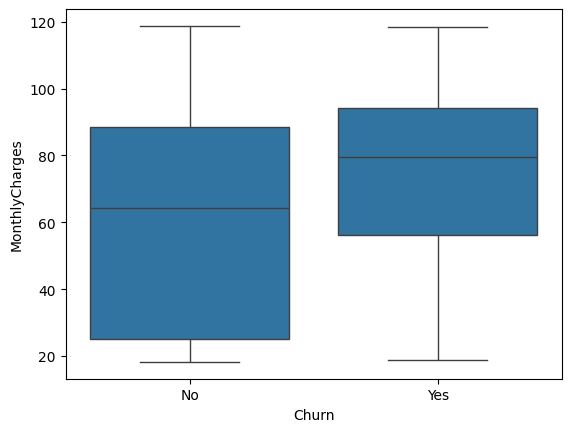

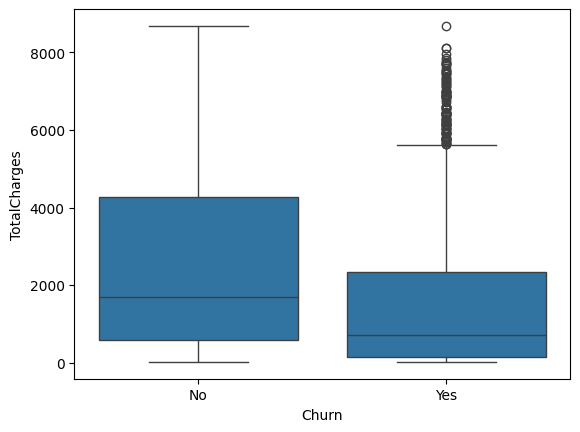

In [40]:
num_cols = df.select_dtypes(include = ["int", "float"])
for col in num_cols:
    sns.boxplot(data=df, y=col, x="Churn")
    plt.show()

* Basically the customers who choose high charge plans are not satisfied with the plan or customer services they are getting for it. They're not staying for more time and they are moving out(Churned).

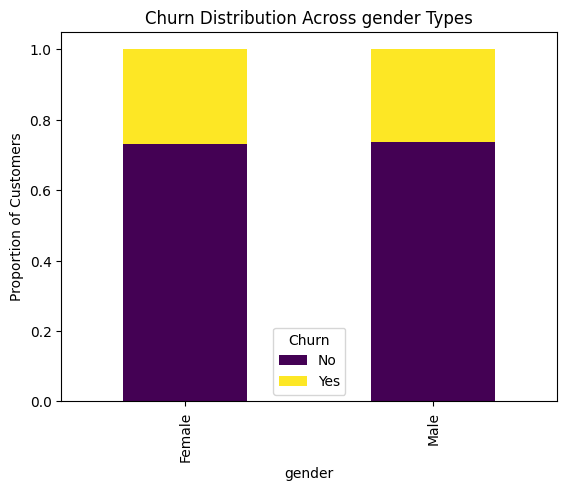

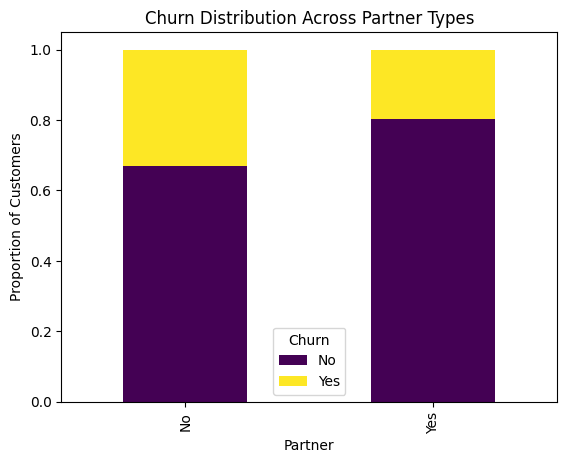

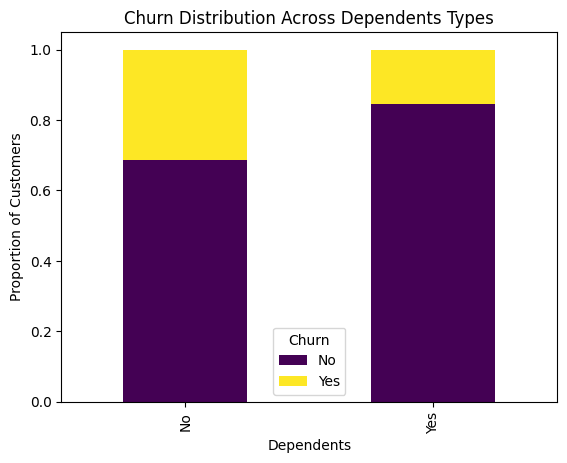

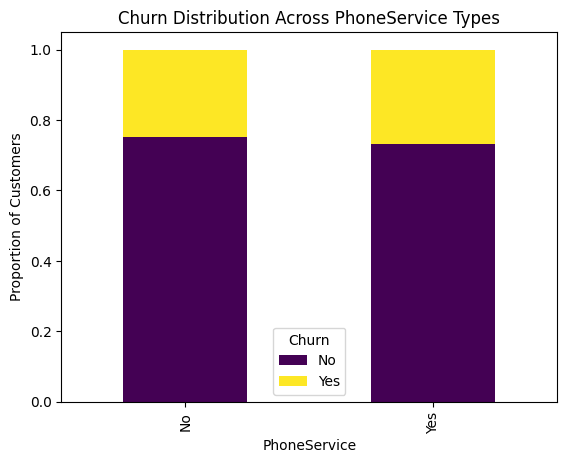

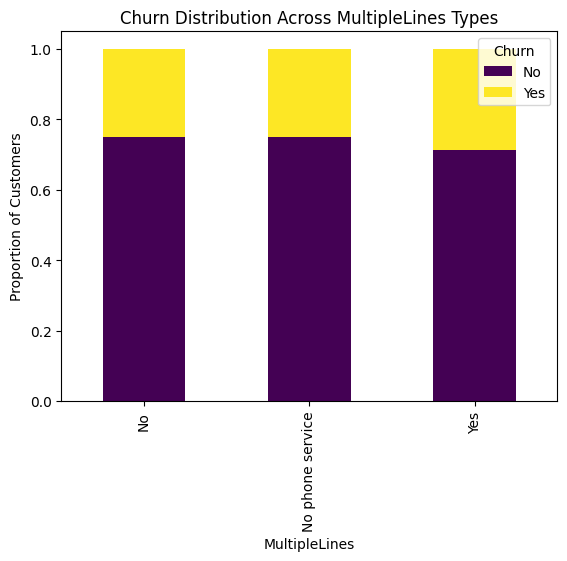

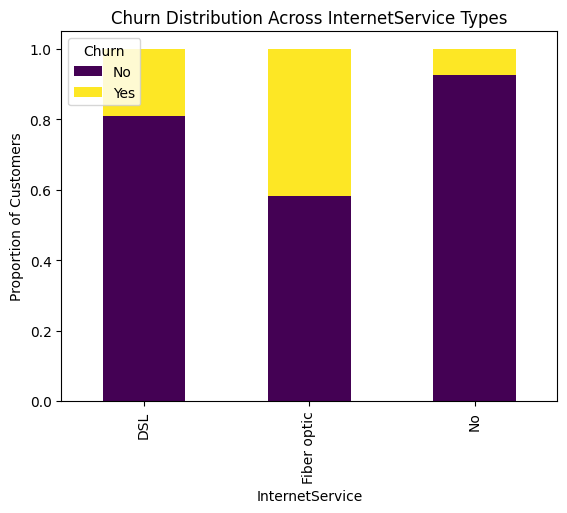

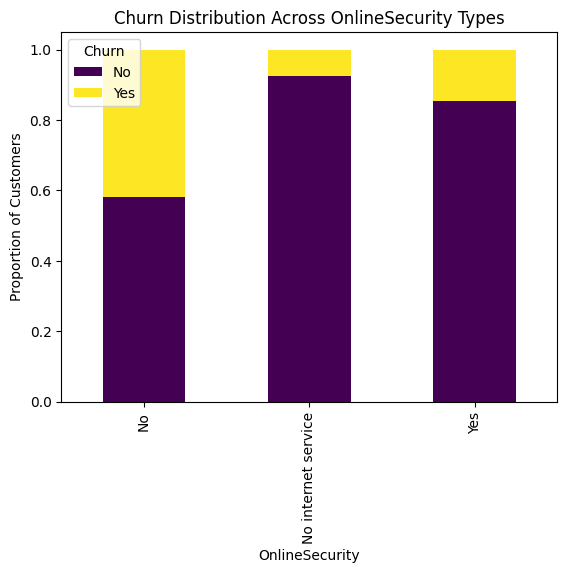

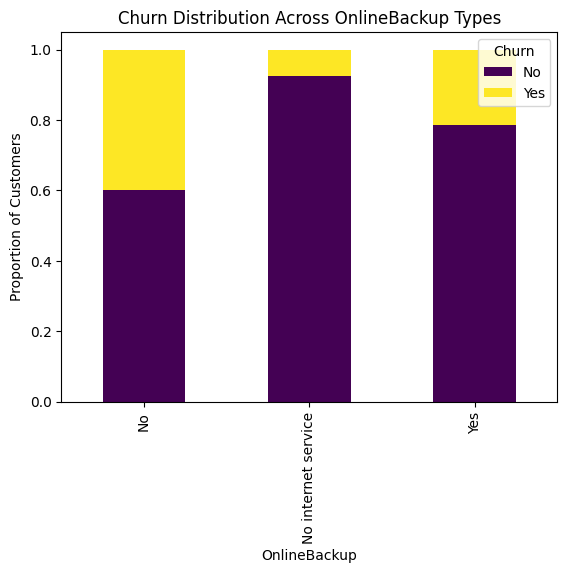

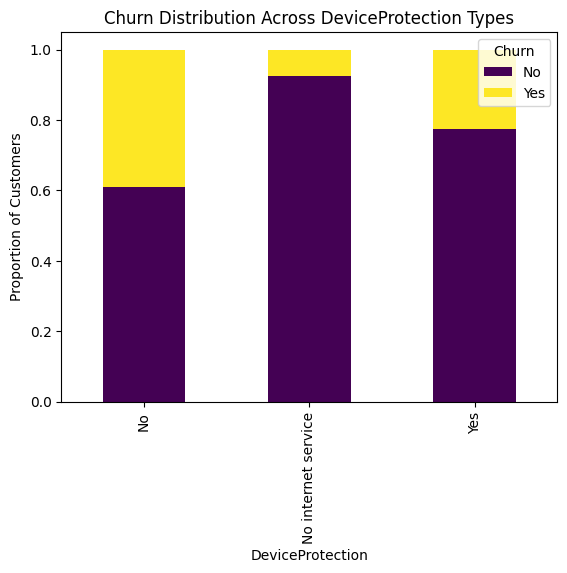

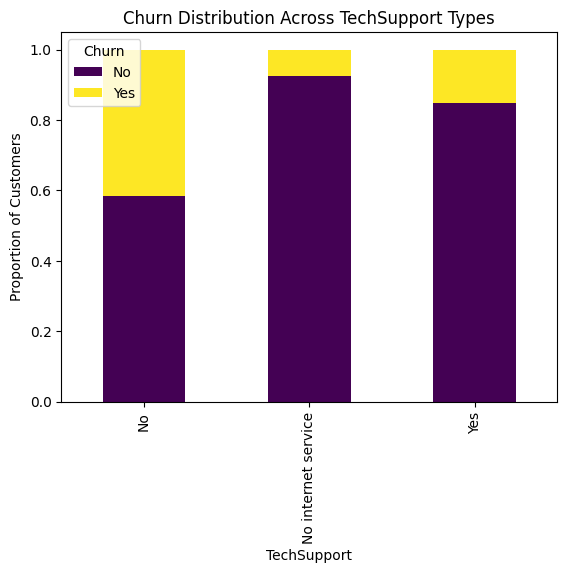

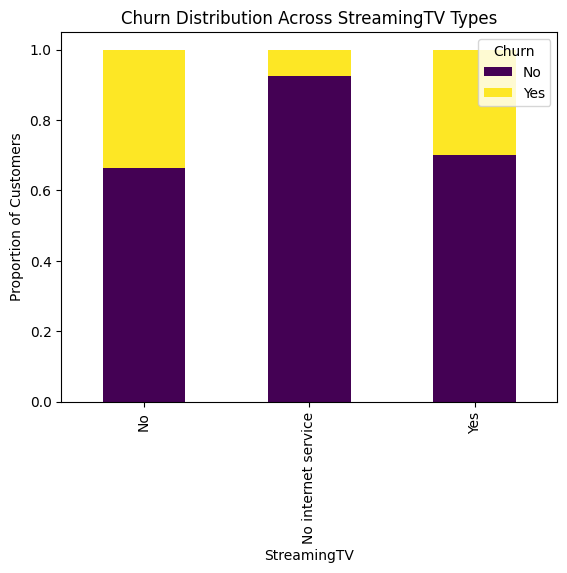

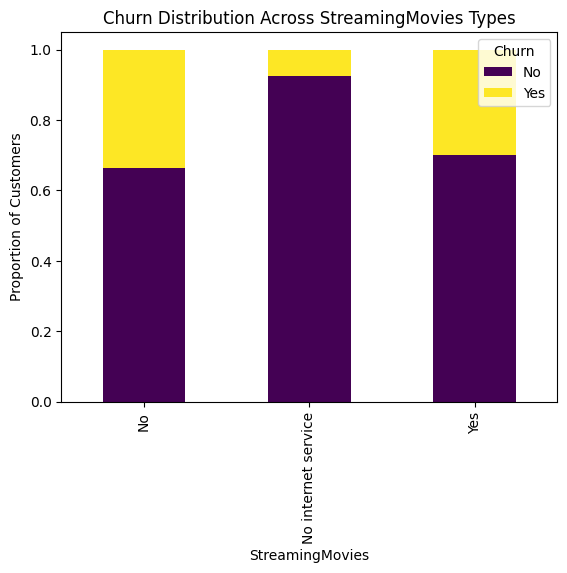

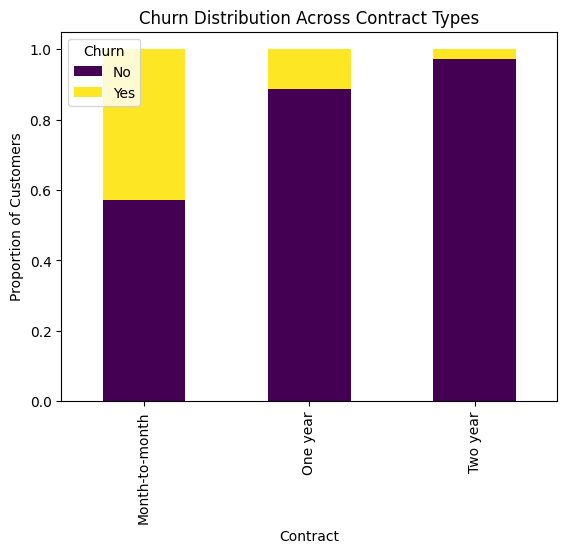

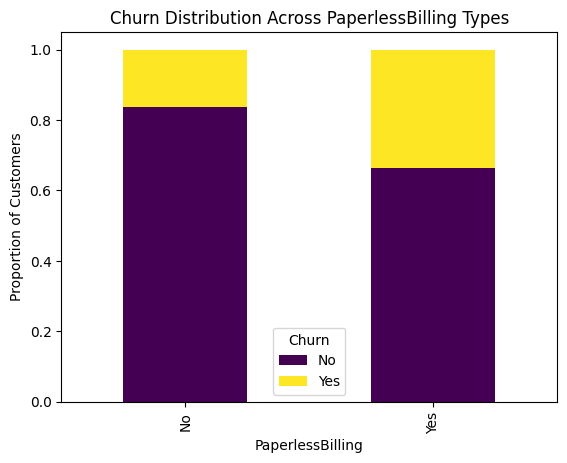

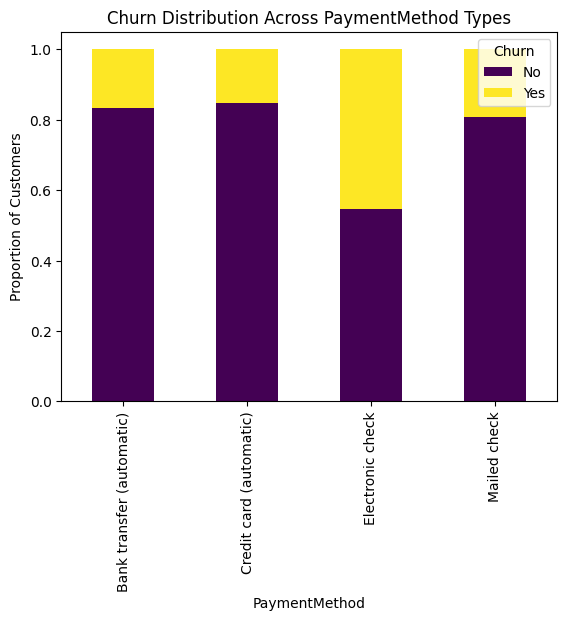

In [41]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols = cat_cols.drop(labels=["customerID", "Churn"])
for col in cat_cols:
    crosstab = pd.crosstab(df[col], df['Churn'], normalize='index')
    crosstab.plot(kind='bar', stacked=True, colormap='viridis')
    plt.title(f"Churn Distribution Across {col} Types")
    plt.ylabel("Proportion of Customers")
plt.show()

* Contract Type: Customers with month-to-month contracts churn significantly more than those with long-term contracts — making this a strong predictive feature.

* Internet Service: Users with fiber optic internet have a higher churn rate compared to DSL or no internet service.

* Additional Services: Customers who do not use extra services like OnlineSecurity, TechSupport, or Streaming are more likely to churn.

* Payment Method: Churn is higher among those using electronic checks, while credit card or bank transfer users are more stable.

* Crosstab Heatmap: It visually summarizes all categorical features against churn, making it easy to identify which features are useful for prediction and which are not (e.g., Gender, PhoneService).

### MULTIVARIATE ANALYSIS

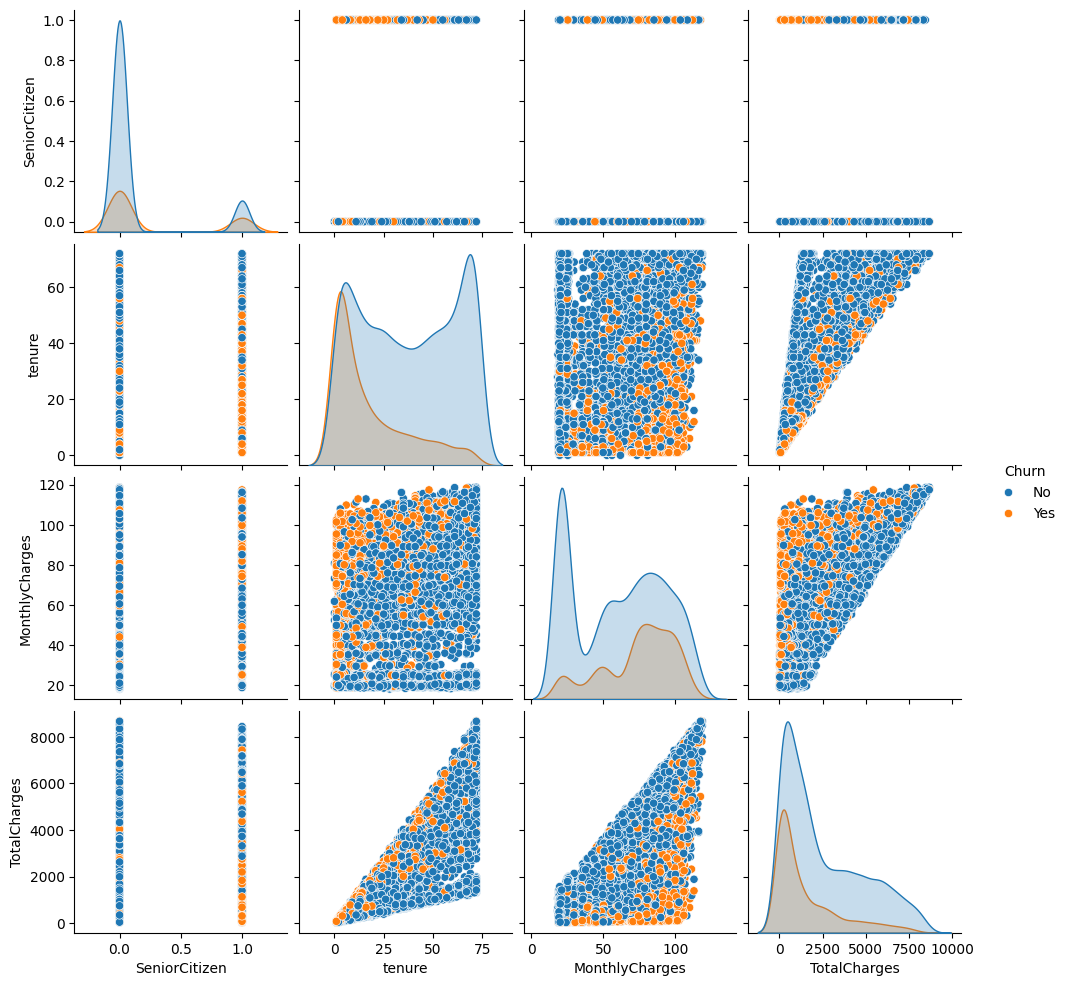

In [42]:
sns.pairplot(df, hue='Churn', diag_kind='kde')
plt.show()

* Low tenure customers churn more — churned users (orange) are clustered at the lower end of the tenure axis.

* Higher MonthlyCharges are linked to churn — churned users tend to have higher monthly payments.

* TotalCharges and tenure are highly correlated — they follow a near-perfect diagonal, so one can be dropped to avoid redundancy.

* SeniorCitizen doesn’t show clear separation — it has weak predictive power visually and may be less important for the model.

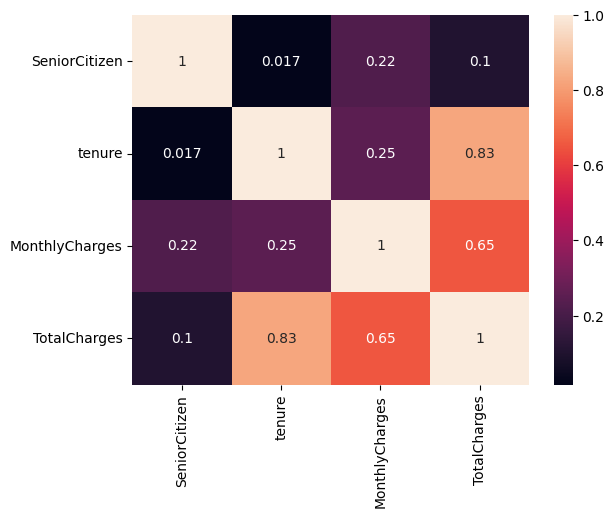

In [ ]:
# Checking for mullticollinearity between features

sns.heatmap(df.select_dtypes(include=["int", "float"]).corr(), annot=True)
plt.show()